https://scotthosking.com/notebooks/wrf_with_xarray/


In [2]:
%conda install -c conda-forge scipy


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\JMCabrera\AppData\Local\miniconda3\envs\wrf_output

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scipy-1.15.2               |  py310h15c175c_0        13.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        13.7 MB

The following NEW packages will be INSTALLED:

  scipy              conda-forge/win-64::scipy-1.15.2-py310h15c175c_0 
  vc14_runtime       conda-forge/win-64::vc14_runtime-14.42.34438-hfd919c2_24 

The following packages will be UPDATED:

  openssl                                  3.1.0-hcfcfb64_3 --> 3.4.1-ha4e3fda_0 
  vs2015_runtime     pkgs/main::vs2015_runtime-14.42.34433~ --> conda-forge::vs2015_run

In [4]:
import os
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np

import cartopy.crs as crs
import cartopy.crs as ccrs

import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import scipy

%matplotlib inline

## Change file names

In [5]:
folder = 'wrfout'
for filename in os.listdir(folder):
    # Check if the filename contains a colon
    if '%' in filename or ':' in filename:
        new_filename = filename.replace("%", "-")
        new_filename = filename.replace(":", "-")
        old_path = os.path.join(folder, filename)
        new_path = os.path.join(folder, new_filename)
        os.rename(old_path, new_path)
        print(f"Renamed: {filename} -> {new_filename}")

## File upload

In [20]:
root = 'wrfout'
nc = Dataset(root + '/wrfout_d03_2025-03-04_08-3A00-3A00')

## Temperature T2

In [27]:
t2 =  wrf.getvar(nc, "T2", timeidx=0)
print(t2)

<xarray.DataArray 'T2' (south_north: 100, west_east: 100)> Size: 40kB
array([[279.6635 , 279.5325 , 279.35266, ..., 288.20364, 288.25037,
        288.29462],
       [279.42566, 279.31183, 279.15912, ..., 288.17953, 288.22162,
        288.26483],
       [279.16684, 279.06964, 278.9292 , ..., 288.13995, 288.19287,
        288.23425],
       ...,
       [286.93857, 287.01212, 287.03683, ..., 290.30173, 290.30606,
        290.30823],
       [287.17984, 287.20514, 287.37054, ..., 290.30222, 290.30698,
        290.30927],
       [287.31924, 287.42252, 287.52487, ..., 290.3012 , 290.30576,
        290.3093 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 40kB -15.62 -15.62 ... -15.39
    XLAT     (south_north, west_east) float32 40kB 27.95 27.95 ... 28.15 28.15
    XTIME    float32 4B 120.0
    Time     datetime64[ns] 8B 2025-03-04T08:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    descriptio

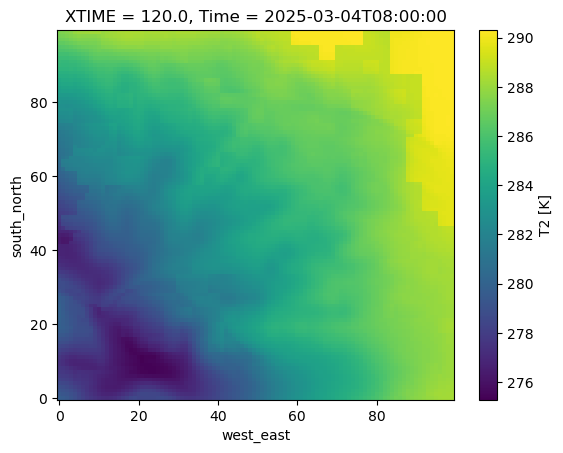

In [22]:
t2.plot()

## WIND

In [23]:
u10 = wrf.getvar(nc, 'U10', timeidx=0)  
v10 = wrf.getvar(nc, 'V10', timeidx=0)

nx = nc.dimensions['west_east'].size
ny = nc.dimensions['south_north'].size
dt, dx, dy = nc.DT, nc.DX, nc.DY
cen_lat, cen_lon = nc.CEN_LAT, nc.CEN_LON  # center of the domain
truelat1, truelat2 = nc.TRUELAT1, nc.TRUELAT2  # true latitudes
pole_lat, pole_lon = nc.POLE_LAT, nc.POLE_LON  # coordinates of the pole    

In [24]:
cone = 1.0
uv = wrf.uvmet(u10, v10, u10.XLONG, u10.XLAT, cone, cen_lon, meta=True, units=' m s-1')
uv

<xarray.DataArray 'uvmet' (u_v: 2, south_north: 100, west_east: 100)> Size: 80kB
array([[[-4.1802077, -4.1828294, -4.287963 , ..., -2.6799932,
         -2.6010544, -2.6102903],
        [-4.1895795, -4.2043314, -4.335238 , ..., -2.5948284,
         -2.5085945, -2.533643 ],
        [-4.18394  , -4.23238  , -4.371676 , ..., -2.490198 ,
         -2.4687946, -2.4605615],
        ...,
        [-1.0808995, -1.0871005, -1.1061941, ..., -3.8814192,
         -3.9336545, -3.9839377],
        [-1.1590023, -1.2069807, -1.1595333, ..., -3.925153 ,
         -3.9768183, -4.0156126],
        [-1.3115354, -1.3148981, -1.3050759, ..., -3.969925 ,
         -4.0081496, -4.0343895]],

       [[-1.890662 , -1.5630541, -1.336999 , ..., -5.50411  ,
         -5.4511633, -5.4645343],
        [-1.8137295, -1.4748175, -1.2819748, ..., -5.5720377,
         -5.5412354, -5.505132 ],
        [-1.759415 , -1.4104515, -1.1708869, ..., -5.6009417,
         -5.631734 , -5.5587163],
        ...,
        [-1.2270571, -1.2433648, -1.3215046, ..., -4.0899906,
         -4.0938234, -4.1024795],
        [-1.2407715, -1.303054 , -1.2718617, ..., -4.034022 ,
         -4.0315933, -4.0425572],
        [-1.2718027, -1.2890378, -1.3066772, ..., -3.978565 ,
         -3.9885442, -3.999166 ]]], dtype=float32)
Coordinates:
  * u_v      (u_v) <U1 8B 'u' 'v'
Dimensions without coordinates: south_north, west_east
Attributes:
    units:         m s-1
    description:  earth rotated u,v

C:\Users\JMCabrera\AppData\Local\Temp\ipykernel_6124\3106243511.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  transform=crs.PlateCarree(), cmap=get_cmap("Reds"))


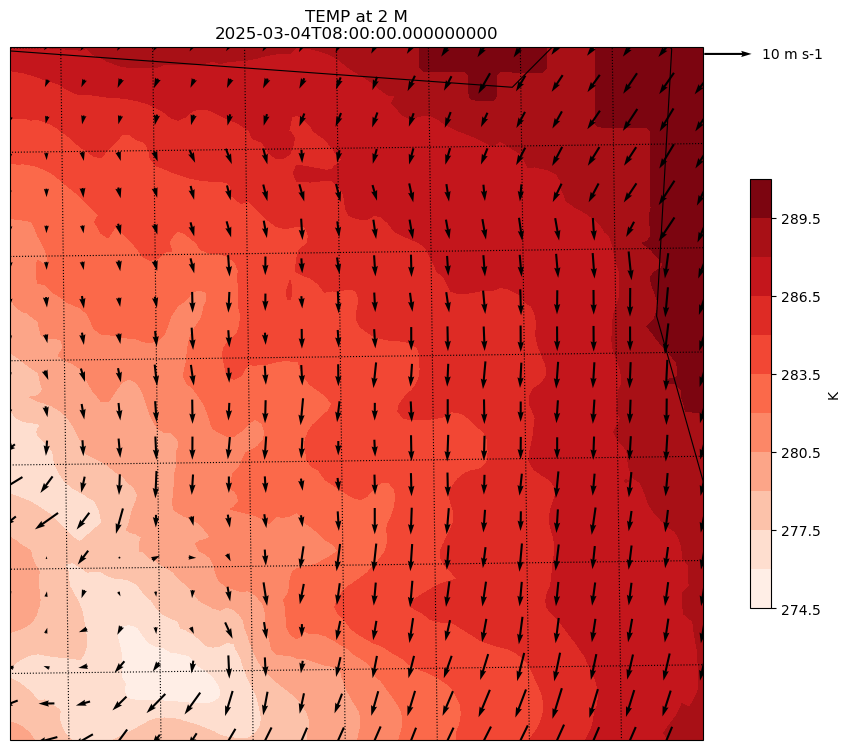

In [25]:
fig = plt.figure(figsize=(12,9))
# Set the GeoAxes to the projection used by WRF
cart_proj = wrf.get_cartopy(t2)
lats, lons = wrf.latlon_coords(t2)
ax = plt.axes(projection=cart_proj)

# Add coastlines
ax.coastlines('50m', linewidth=0.8)
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m', 
                                           linewidth=1.0, edgecolor='k', facecolor='none'))

# Plot the wind speed as a contour plot
plt.contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(t2), 10, 
                transform=crs.PlateCarree(), cmap=get_cmap("Reds"))

# Add a color bar
cbar = plt.colorbar(ax=ax, shrink=.62)
cbar.set_label(t2.units)

# Set the map limits.  Not really necessary, but used for demonstration.
ax.set_xlim(wrf.cartopy_xlim(t2))
ax.set_ylim(wrf.cartopy_ylim(t2))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title(t2.description+'\n'+str(t2.Time.values))

# Add arrows to show the wind vectors !!!!
x = u10.XLONG.values
y = u10.XLAT.values
u = uv[0].values
v = uv[1].values

Q = plt.quiver( x, y, u, v, 
               pivot='middle', 
               transform=crs.PlateCarree(), 
               regrid_shape=20 
               )

### plot quiver key
qk = plt.quiverkey(Q, 
                   1.07, 0.99,                  # x,y label position
                   10, str(10)+' '+u10.units, # choose units + update string
                   labelpos='E',                # add label to the right
                   coordinates='axes'
                   )